In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/train2.csv")

# Yeni Bölüm

In [ ]:
df.head

<bound method NDFrame.head of          69769    -946  0.1613  0.7959999999999999  Panl  N  Bus2  0.0742  0  \
0       236977     -92     NaN                 NaN   NaN  Y  Othr     NaN  0   
1       168821   -1646  0.1124              0.8504  Panl  N  Bus3  0.0387  0   
2        94708   -1651  0.0263                 NaN  Blok  N  Bus3     NaN  0   
3        84556    -977     NaN                 NaN   NaN  N  Rest     NaN  0   
4       114510  365243  0.1067              0.8096  Panl  N  XNAA  0.0525  0   
...        ...     ...     ...                 ...   ... ..   ...     ... ..   
246002  248161    -595     NaN                 NaN   NaN  N  Bus3     NaN  0   
246003  257069   -4334  0.1145              0.8368  Panl  N  Mede  0.1180  0   
246004  154350  365243  0.3025              0.6056  Mixd  N  XNAA  0.2233  0   
246005  148183  365243     NaN                 NaN   NaN  N  XNAA     NaN  0   
246006    5167  365243     NaN                 NaN   NaN  Y  XNAA     NaN  0   

        2

In [ ]:
df.shape

(246007, 122)

In [ ]:
num_cols = len(df.columns)
df.columns = ["C" + str(i) for i in range(1, num_cols+1)]

In [ ]:
df.head

<bound method NDFrame.head of             C1      C2      C3      C4    C5 C6    C7      C8  C9  C10  ...  \
0       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
1       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
2        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
3        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
4       114510  365243  0.1067  0.8096  Panl  N  XNAA  0.0525   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246002  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246003  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246004  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246005  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246006    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        C113  C114   

# Yeni Bölüm

In [ ]:
df.dtypes

C1        int64
C2        int64
C3      float64
C4      float64
C5       object
         ...   
C118     object
C119    float64
C120    float64
C121      int64
C122      int64
Length: 122, dtype: object

In [ ]:
df.isnull().sum()
#hangi kolonda kaç tane null değer var buna baktık

C1           0
C2           0
C3      143829
C4      163543
C5      124975
         ...  
C118         0
C119       811
C120    122297
C121         0
C122         0
Length: 122, dtype: int64

In [ ]:
NaColumn = df.columns[df.isnull().mean()>=0.10]
df= df.drop(NaColumn, axis=1)
#Eğer bir kolondaki değerlerin %10'tan fazlası null ise o kolonları datasetten çıkardık

In [ ]:
dtypes = df.dtypes

continuous = []
binary = []
categorical = []
label = []

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("C122")
label.append("C122")

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    unique_values = df[col].value_counts()
    print(f"{col}---{len(unique_values)}")

###hangi object tipindedeki sütunda kaç tane kategori var buna baktık

C6---2
C7---51
C17---7
C31---8
C32---6
C48---2
C68---5
C70---3
C94---7
C104---2
C118---6


In [ ]:
for column in df.columns:

    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary = {unique_values[0]: 0, unique_values[1]: 1}
        df[column] = df[column].replace(binary)
  
###2 kategori içeren object tipindeki sütunlardaki kategorileri binary hale getirdik for döngüsü yardımıyla aşağıda da A1 ve A6 sütununu çalıştırarak kontrol ettik 
### 236977 ID'li kişinin A6 sütununda karşısında Y yazıyordu ve bunu 1'e çevirmiş yani for döngümüz çalışmış  
print(df[['C1', 'C6']].head())

       C1  C6
0  236977   0
1  168821   1
2   94708   1
3   84556   1
4  114510   1


In [ ]:
column_cat = df.select_dtypes(include='object').columns
print(column_cat)
#bu işlemlerin ardından 8 kategorik datamız kaldı bunları elemeden önce satır bazında eğer kalan kolonlardan yarısı boş olan bir datamız varsa bu datayı setten çıkartalım

Index(['C7', 'C17', 'C31', 'C32', 'C68', 'C70', 'C94', 'C118'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:

le = LabelEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])

for col in categorical:
    if len(df[col].unique()) == 2:
        categorical.remove(col)
        binary.append(col)
#### bu kısım aslında yukarda 2 kategori içerenleri binary yapma kısmı ama bu berkantın yazdığı kod benim yazdığım yukarda


In [ ]:
df[continuous] = df.groupby("C122")[continuous].apply(lambda x: x.fillna(x.median()))

#sayısal değer olup NA değer içeren sütunlardaki NA'ler yerine o sütunun medianı ile doldurduk

<ipython-input-122-1ffb068b4fb2>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[continuous] = df.groupby("C122")[continuous].apply(lambda x: x.fillna(x.median()))


In [ ]:
df[categorical] = df.groupby("C122")[categorical].apply(lambda x: x.fillna(x.mode().iloc[0]))

#### kategorik data içeren ve NA olan sütunlardaki NA'leri o sütunun mode'u ile doldurduk

<ipython-input-128-64a6e95369ff>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[categorical] = df.groupby("C122")[categorical].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [ ]:
df.isnull().sum()

C1      0
C2      0
C6      0
C7      0
C9      0
       ..
C117    0
C118    0
C119    0
C121    0
C122    0
Length: 65, dtype: int64

In [ ]:
df["C122"].value_counts()
df["C122"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: C122, dtype: float64

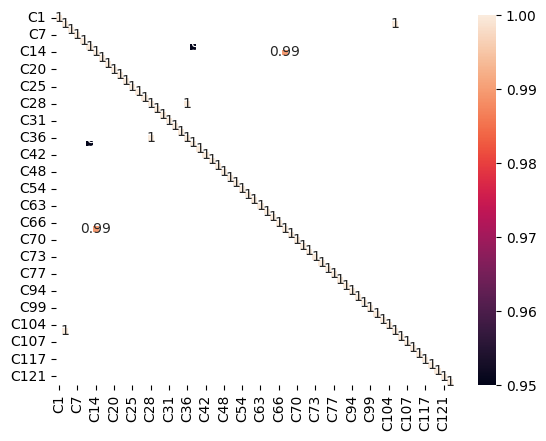

In [ ]:
corr_matrix = df.corr().round(2)

# 0.9'dan fazla korelasyon içeren sütunları filtreledik
corr_filtered = corr_matrix[(corr_matrix > 0.90) | (corr_matrix < -0.90)]

sns.heatmap(corr_filtered, annot=True)
plt.show()

In [ ]:
high_corr_pairs = []
threshold = 0.9
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if corr_matrix.iloc[i,j] >= threshold:
            high_corr_pairs.append((df.columns[i], df.columns[j]))
#korelasyonu 0.9'dan fazla olan kolonlar

In [ ]:
high_corr_pairs
##### korelasyonu 0.9 dan fazla olan sütun ikilileri

[('C2', 'C105'), ('C10', 'C38'), ('C14', 'C67'), ('C28', 'C36')]

In [ ]:
for pair in high_corr_pairs:
    if pair[0] in df.columns and pair[1] in df.columns:
        if pair[0] in continuous:
            df = df.drop(pair[1], axis=1)
        elif pair[1] in continuous:
            df = df.drop(pair[0], axis=1)
        else:
            vif_pair_0 = variance_inflation_factor(df.values, df.columns.get_loc(pair[0]))
            vif_pair_1 = variance_inflation_factor(df.values, df.columns.get_loc(pair[1]))
            if vif_pair_0 >= vif_pair_1:
                df = df.drop(pair[1], axis=1)
            else:
                df = df.drop(pair[0], axis=1)

In [ ]:
df.head()
#datasetin so

,C1,C2,C6,C7,C9,C10,C14,C16,C17,C20,...,C104,C106,C107,C109,C114,C117,C118,C119,C121,C122
0,236977,-92,0,30,0,3,135000.0,0,6,0,...,0,0,0,0,-1994,0,1,0.0,0,0
1,168821,-1646,1,5,0,2,553500.0,0,5,0,...,0,0,0,0,-2842,0,3,0.0,0,1
2,94708,-1651,1,5,0,2,391500.0,0,6,0,...,0,0,0,0,-1345,0,3,0.0,0,1
3,84556,-977,1,35,0,2,225000.0,0,6,0,...,0,0,0,0,-852,0,3,0.0,0,0
4,114510,365243,1,50,0,2,225000.0,0,6,0,...,1,0,0,0,-4138,0,1,0.0,0,0


In [ ]:
#################### MACHINE LEARNING #####################################333